<a href="https://colab.research.google.com/github/PierreCabot/PierreCODER/blob/main/Entrega_final_DSII_PierreCabot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




#Entrega final DATA SCIENCE II CODERHOUSE

#Pierre Cabot

#Predicción de ACV (clasificación binaria)

# 1) Dependencias

In [340]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr, spearmanr
import scipy.stats as stats

from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV, StratifiedKFold, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, recall_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score

#2) Introducción

 **Descripción:**

 El siguiente dataset fue obtenido de la dirección https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset. Este conjunto de datos se utiliza para predecir si es probable que un paciente sufra un accidente cerebrovascular en función de parámetros de entrada como el sexo, la edad, diversas enfermedades y el tabaquismo. Cada fila de los datos proporciona información relevante sobre el paciente.

Tiene como por título en inglés "Stroke Prediction Dataset".

 **Contexto:**

Según la Organización Mundial de la Salud (OMS), el accidente cerebrovascular es la segunda causa de muerte a nivel mundial y es responsable de aproximadamente el 11% del total de muertes.

**Alcance:**

Este trabajo esta dirigido a profesionales de la salud con el fin de informar y dar a conocer las principales variables que afectan a una persona a la hora de sufrir un ACV.

**Motivación:**

Los problemas de salud nos afecta tanto directa o indirectamente, por lo tanto es desafiante el hecho de que se posean datos respecto a estos accidentes, con el fin de preveenir de que nos ocurra en el caso de estar en condiciones de riesgo.

**Hipótesis/Preguntas**

Factores de riesgo como el fumar o haber fumado durante los años de vida aumenta la probabilidad de tener un ictus y el pertencer a la población femenina aumenta aún más.

¿Puede el estar casado o divorciado aumentar el riesgo de sufrir un ACV?
¿Aquellos que viven en la ciudad sufren más accidentes que los de la zona rural?





#3) Descripción de variables

1) ID: identificador único

2) Gender: "Masculino", "Femenino" u "Otro"

3) Age: edad del paciente

4) Hypertension: 0 si el paciente no tiene hipertensión, 1 si el paciente tiene hipertensión

5) Heart_disease: 0 si el paciente no tiene ninguna enfermedad cardíaca, 1 si el paciente tiene una enfermedad cardíaca

6) Ever_married: "No" o "Sí"

7) Work_type: "niños", "Govt_jov", "Never_worked", "Privado" o "Autónomo"

8) Residence_type: "Rural" o "Urbana"

9) Avg_glucose_level: nivel promedio de glucosa en sangre

10) BMI: índice de masa corporal

11) Smoke_status: "anteriormente fumó", "nunca fumó", "fuma" o "Desconocido"*

12) Stroke: 1 si el paciente tuvo un ictus o 0 si no

#4) Data acquisition

In [341]:
url = 'https://github.com/PierreCabot/PierreCODER/raw/main/healthcare-dataset-stroke-data.csv'
df =pd.read_csv(url)
#Se sube el dataset desde github

#5) Data exploration

In [342]:
df.shape

(5110, 12)

In [343]:
#El dataset posee 5110 registros con 12 columnas

In [344]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

 Se consulta cuales son cada una de estas columnas

In [345]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [346]:
duplicados = df['id'].duplicated().sum()
print(duplicados)

0


No existen datos duplicados

In [347]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [348]:
# Se puede observar al investigar las características de los datos, de que en la columna "bmi" hay menos datos que los registros totales, esto nos está dando un indicio de la faltante de datos

In [349]:
df.smoking_status.value_counts()

,count
smoking_status,
never smoked,1892
Unknown,1544
formerly smoked,885
smokes,789


In [350]:
df.stroke.value_counts()

,count
stroke,
0,4861
1,249


In [351]:
df.gender.value_counts()

,count
gender,
Female,2994
Male,2115
Other,1


Existe un valor de género definido como "other" que será eliminado en posterior tratamiento


#6) Data wrangling


In [352]:
df.set_index('id', inplace=True) #Defino la columna ID como índice


In [353]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [354]:
df1=df[df['gender'] != 'Other'] #se elimina la fila con género "other" (es 1 dato unico en el dataset) ya que en la visualización de datos no aporta significado


##6.1) Datos nulos

In [355]:
#Total de valores faltantes en registros de "bmi"
df1.isna().sum().sort_values(ascending = False)

,0
bmi,201
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
smoking_status,0


201 valores de  BMI sin registro. Proporción de nulos relativamente baja

In [356]:
df2 = df1.dropna()

In [357]:
df2.info() #consulto la cantidad de datos totales luego de eliminar los nulos

<class 'pandas.core.frame.DataFrame'>
Index: 4908 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4908 non-null   object 
 1   age                4908 non-null   float64
 2   hypertension       4908 non-null   int64  
 3   heart_disease      4908 non-null   int64  
 4   ever_married       4908 non-null   object 
 5   work_type          4908 non-null   object 
 6   Residence_type     4908 non-null   object 
 7   avg_glucose_level  4908 non-null   float64
 8   bmi                4908 non-null   float64
 9   smoking_status     4908 non-null   object 
 10  stroke             4908 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.1+ KB


In [358]:
df2.isna().sum().sort_values(ascending = False)

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0
smoking_status,0


Los valores faltantes ahora son 0

#7) Exploratory data analysis

In [359]:
df2.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4908.000000,4908.000000,4908.000000,4908.000000,4908.00000,4908.000000
mean,42.868810,0.091891,0.049511,105.297402,28.89456,0.042584
std,22.556128,0.288901,0.216954,44.425550,7.85432,0.201937
min,0.080000,0.000000,0.000000,55.120000,10.30000,0.000000
25%,25.000000,0.000000,0.000000,77.067500,23.50000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.10000,0.000000
75%,60.000000,0.000000,0.000000,113.495000,33.10000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.60000,1.000000


Se procede a definir las siguientes variables como categóricas

In [360]:
df2.loc[:,'hypertension'] = df2['hypertension'].astype('category')
df2.loc[:, 'heart_disease'] = df2['heart_disease'].astype('category')
df2.loc[:,'stroke']=df2['stroke'].astype('category')
df2.describe(include='category')

,hypertension,heart_disease,stroke
count,4908,4908,4908
unique,2,2,2
top,0,0,0
freq,4457,4665,4699


In [361]:
df.describe(include='object')

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


## 7.1) Análisis univariado

###7.1.1) Análisis de variables categóricas

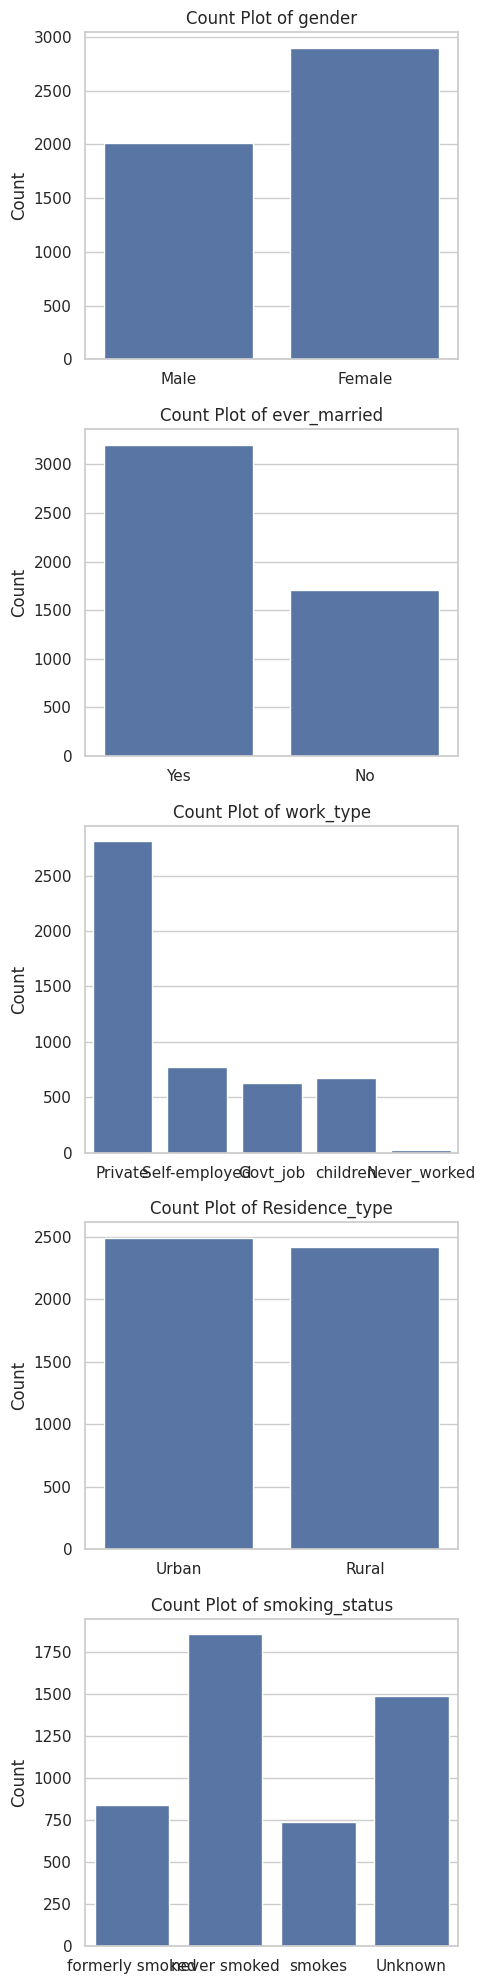

In [362]:
variables_categoricas = df2.select_dtypes(include=['object']).columns.tolist()
fig, axes = plt.subplots(len(variables_categoricas), 1, figsize=(5, len(variables_categoricas) * 4))

for i, col in enumerate(variables_categoricas):
    sns.countplot(x=df2[col], ax=axes[i])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

###7.1.2) Análisis de variables continuas

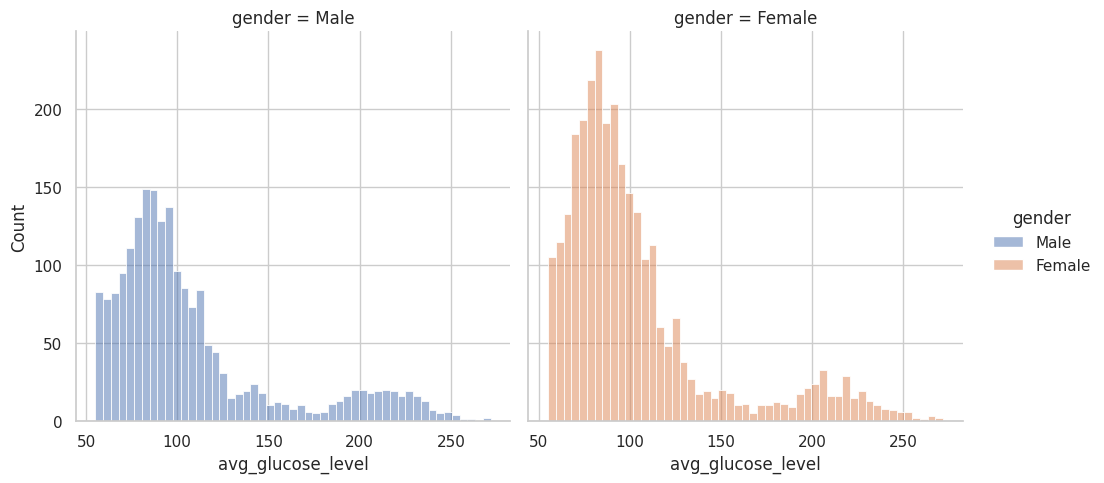

In [363]:
sns.displot(data=df2, x="avg_glucose_level", hue="gender", col="gender")   # se grafica la distribución de la variable "bmi" y "avg_glucose_level" tanto para hombre como para mujer. Existe el género "otro" pero se omite para el análsis

Se hace llamativo el tipo de distribución de la glucosa en sangre de las personas registradas. No se posee información en que condiciones fueron tomadas estas medidas, si en ayunas o por ej: 2 horas después de comer. Un valor de glucosa en sangre de 200 mg/dl está muy por encima de lo que una persona sana tendría en ayunas (alrededor de 100-125 mg/dl) o después de dos horas de comer de 140 a 199 mg/dl. Valores por encima de esto son atípicos, pero su presencia podría estar directamente relacionada con una pre-diabetes o diabetes en sí. Valores altos de glucosa en sangre tienen una alta incidencia en el riesgo de contraer un ACV por lo que estos valores no pueden ser descartados del dataset.

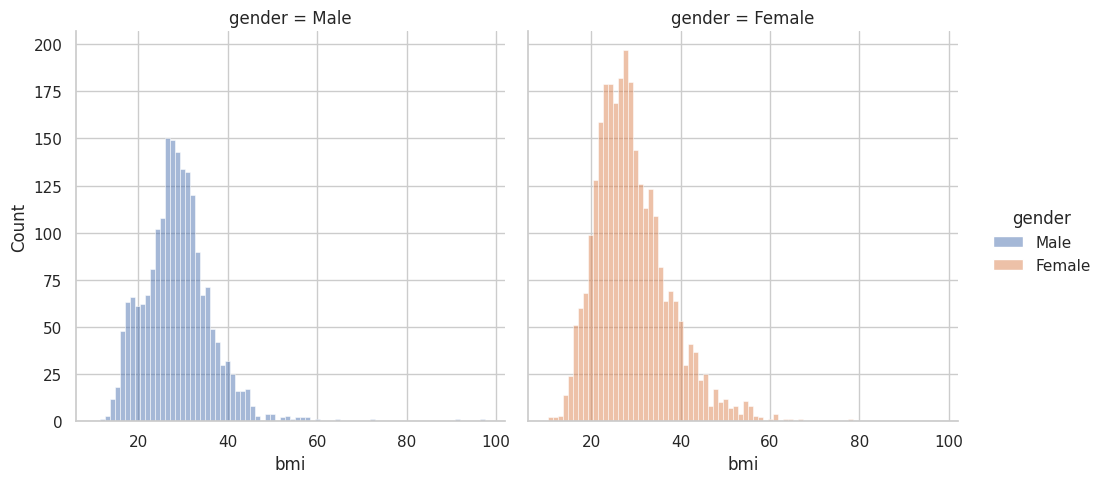

In [364]:
sns.displot(data=df2, x="bmi", hue="gender", col="gender")

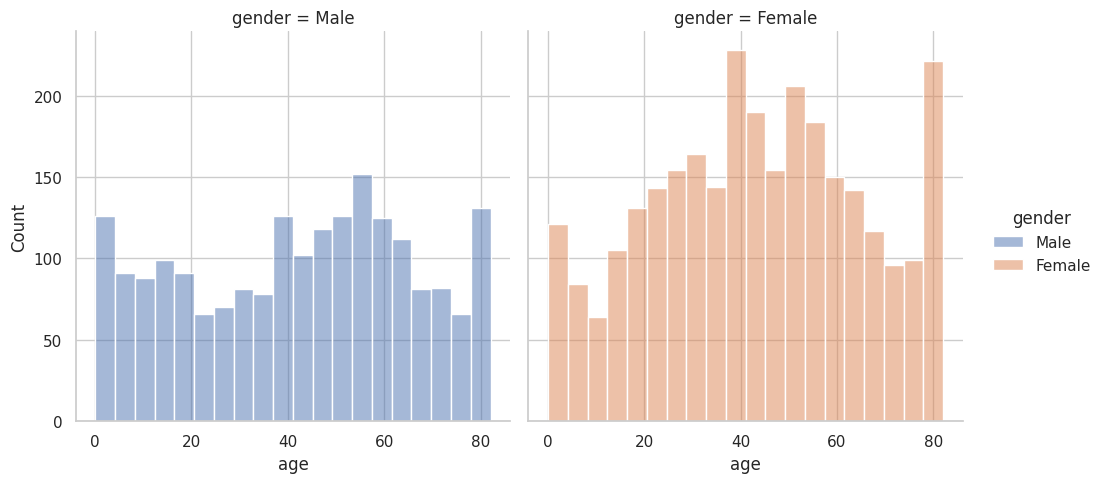

In [365]:
sns.displot(data=df2, x="age", hue="gender", col="gender")

###7.1.3) Detección de outliers

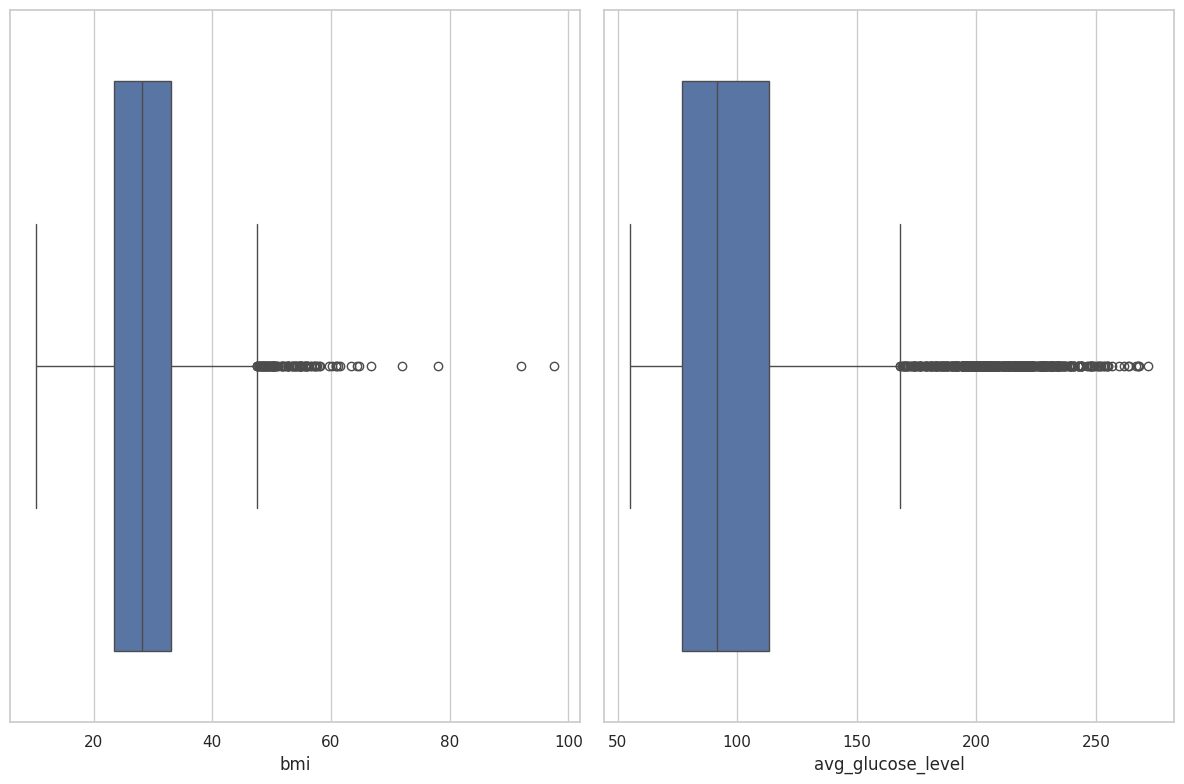

In [366]:
sns.set_theme(style="whitegrid")
f, axs = plt.subplots(1, 2, figsize=(12, 8), gridspec_kw=dict(width_ratios=[4, 4]))
sns.boxplot(data= df2, x=df2.bmi, ax=axs[0])  # se grafica el boxplot de la variable "bmi"
sns.boxplot(data= df2, x=df2.avg_glucose_level, ax=axs[1]) # se grafica el boxplot de la variable "avg_glucose_level"
f.tight_layout()

In [367]:
# Detección de outliers en Variable "BMI"
median = np.median(df2.bmi)
mad = np.median(np.abs(df2.bmi - median))

threshold = 3.5

outliers = df2.bmi[np.abs(df2.bmi- median) / mad > threshold]

print("Outliers detectados en BMI por el Método de las Desviaciones Absolutas Medianas (MAD):")
print("Cantidad de outliers", len(outliers))

Outliers detectados en BMI por el Método de las Desviaciones Absolutas Medianas (MAD):
Cantidad de outliers 177


In [368]:
# Detección de outliers en Variable "avg_glucose_level"
median = np.median(df2.avg_glucose_level)
mad = np.median(np.abs(df2.avg_glucose_level - median))

threshold = 3.5

outliers = df2.avg_glucose_level[np.abs(df2.avg_glucose_level- median) / mad > threshold]
print("Outliers detectados en avg_glucose_level por el Método de las Desviaciones Absolutas Medianas (MAD):")
print("Cantidad de outliers", len(outliers))

Outliers detectados en avg_glucose_level por el Método de las Desviaciones Absolutas Medianas (MAD):
Cantidad de outliers 649


Los oultiers de glucosa en sangre del dataset, representan un 16% del total. Si bien este número es alto, se ve a posterior que estos mismos tienen más relevancia en el estudio realizado, por lo que se mantienen tal cual como están.

###7.1.4) Medidas de asimetría y kurtosis

Se realiza un análisis sobre la variable "bmi" y "avg_glucose_level"





In [369]:
stats.describe(df2.bmi)

DescribeResult(nobs=4908, minmax=(10.3, 97.6), mean=28.894559902200488, variance=61.69034129802093, skewness=1.0547404696625051, kurtosis=3.3576830916071065)

In [370]:
stats.describe(df2.avg_glucose_level)

DescribeResult(nobs=4908, minmax=(55.12, 271.74), mean=105.297402200489, variance=1973.629509675577, skewness=1.6141254474900952, kurtosis=1.9039201565518624)

Distribuciones fuertemente asimétricas

###7.1.5) Test de Shapiro

In [371]:
# Realizo el test de Shapiro sobre los datos de "bmi"
p_value = stats.shapiro(df2.bmi)

print("Valor p:", p_value[1])

# Comparar con nivel de significancia de 0.05
nivel_significancia = 0.05

if p_value[1] < nivel_significancia:
    print("Los datos no siguen una distribución normal.")
else:
    print("Los datos siguen una distribución normal.")

Valor p: 6.759071773727945e-37
Los datos no siguen una distribución normal.


##7.2) Análisis bivariado

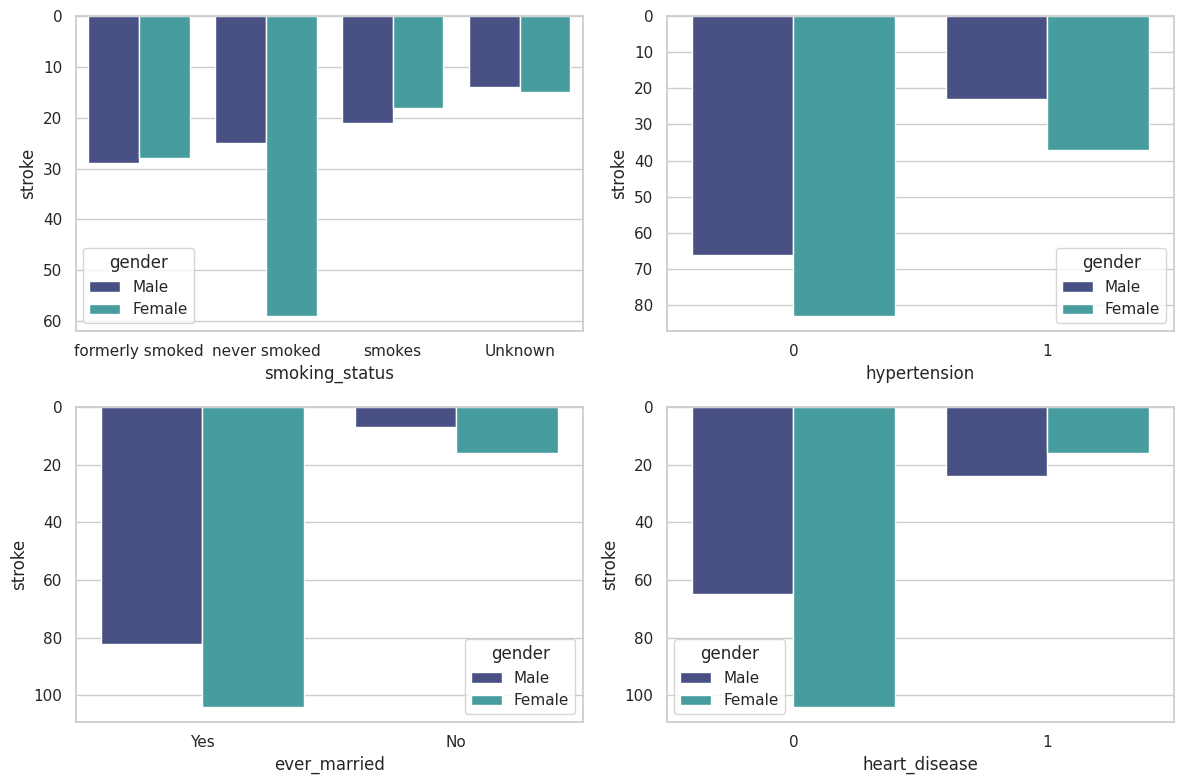

In [372]:
#Análisis de variables categóricas en relación al género y la frecuencia de ictus("stroke")
df2.loc[:,"stroke"]= df2["stroke"].astype(int)
f, axs = plt.subplots(2, 2, figsize=(12, 8), gridspec_kw=dict(width_ratios=[4, 4]))
sns.barplot(data= df2, x="smoking_status", y="stroke", hue="gender", ax=axs[0,0], errorbar=None, palette= "mako", estimator=np.sum)
sns.barplot(data= df2, x="hypertension", y="stroke", hue="gender", ax=axs[0,1], errorbar=None, palette= "mako", estimator=np.sum)
sns.barplot(data= df2, x="ever_married", y="stroke", hue="gender", ax=axs[1,0], errorbar=None, palette= "mako", estimator=np.sum)
sns.barplot(data= df2, x="heart_disease", y="stroke", hue="gender", ax=axs[1,1], errorbar=None, palette= "mako", estimator=np.sum)
f.tight_layout()

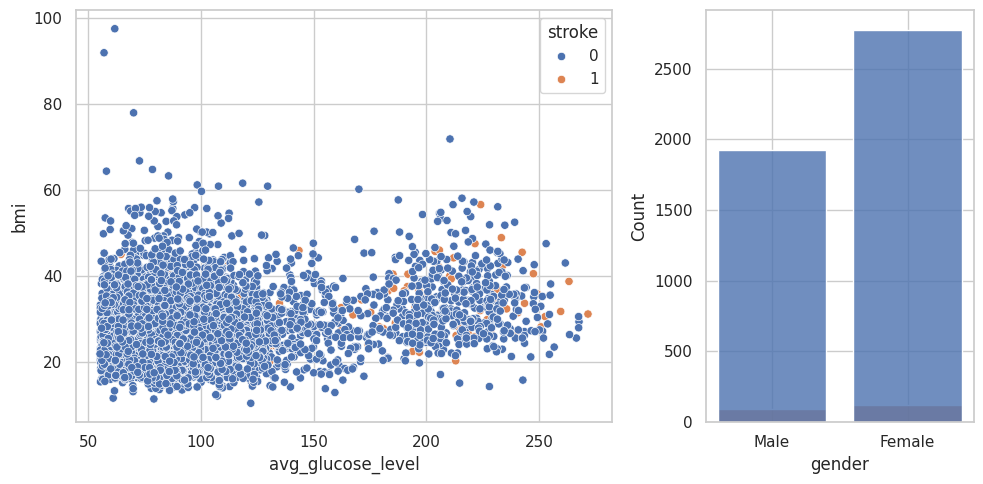

In [373]:
f, axs = plt.subplots(1, 2, figsize=(10, 5), gridspec_kw=dict(width_ratios=[2, 1]))
sns.scatterplot(data= df2, x="avg_glucose_level", y="bmi", hue="stroke", ax=axs[0])
sns.histplot(data= df2, x="gender", hue="stroke", shrink=.8, alpha=.8, legend=False, ax=axs[1])
f.tight_layout()

No existe a simple vista, o no hay suficiente evidencia en los datos para establecer una relación entre IBM y avg_glucose level.

Son varias las conclusiones que se pueden sacar a partir de estos cuatro gráficos de barras. De manera general, la frecuencia de ictus es mayor en las mujeres en todos los casos. Predomina esta tendencia en los datos para las mujeres que nunca fumaron y no tienen hipertensión. Se muestra lo mismo para aquellas que alguna vez estuvieron casadas y tienen alguna enfermedad cardíaca.
La frecuencia de ictus en los hombres es visiblemente menor que en las mujeres.
Se da que en aquellos hombres que son ex-fumadores, mayor tendencia a sufrir un ACV a aquellos que nunca fumaron.

Se puede inferir visualmente que a mayor nivel de glucosa existe una mayor predisposición a sufrir un ACV.

**Se realiza un estudio por género**

In [374]:
#definimos dos nuevos datasets, ahora separándolos por género
women = df2[df2['gender']=='Female']
men = df2[df2['gender']=='Male']

print("Cantidad de mujeres", len(women))
print("Cantidad de hombres", len(men))


Cantidad de mujeres 2897
Cantidad de hombres 2011


Se calcula tanto la cantidad de mujeres como de hombres en el registro con el fin de analizar más profundamente los datos.

Text(0.5, 1.0, 'Hombres')

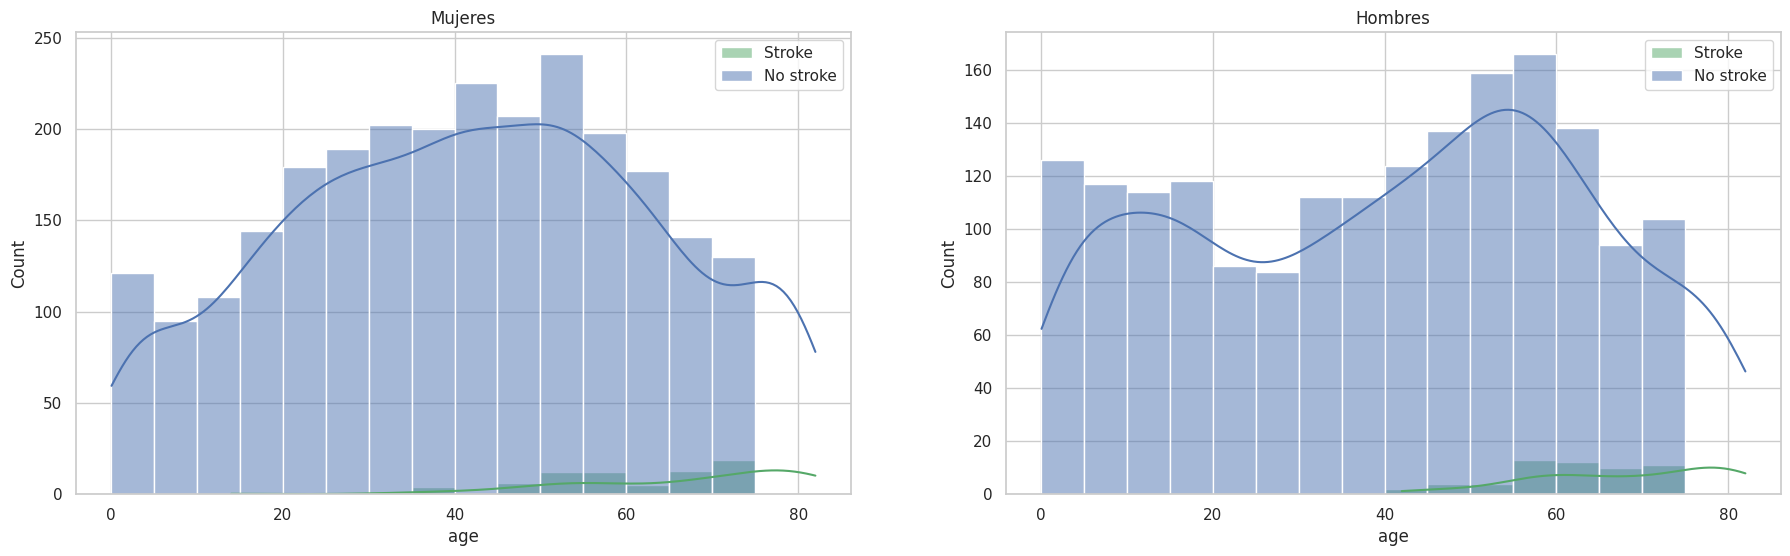

In [375]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(22, 6))
ax = sns.histplot(women[women['stroke']==1].age.dropna(), bins=np.arange(0, 80, 5), label = "Stroke", color='g', ax = axes[0], kde =True)
ax = sns.histplot(women[women['stroke']==0].age.dropna(), bins=np.arange(0, 80, 5), label = "No stroke", color='b', ax = axes[0], kde = True)
ax.legend()
ax.set_title('Mujeres')

ax = sns.histplot(men[men['stroke']==1].age.dropna(), bins=np.arange(0, 80, 5), label = "Stroke",  color='g',ax = axes[1], kde = True)
ax = sns.histplot(men[men['stroke']==0].age.dropna(), bins=np.arange(0, 80, 5), label = "No stroke",  color='b',ax = axes[1], kde = True)
ax.legend()
ax.set_title('Hombres')

En estos dos histogramas se puede observar que aquellos que sufrieron un accidente son mayores de 40 años, esto tanto para los hombres como para las mujeres. Por lo tanto se podría hacer una suposición, que a mayor edad, mayor es la probabilidad de tener un ictus.

In [376]:
Cantidaddemujeresconictus= df2[ (df2['stroke']==1) & (df2['gender']=='Female')]
Cantidaddehombresconictus= df2[ (df2['stroke']==1) & (df2['gender']=='Male')]
print( "Cantidad de hombres con ictus" , len(Cantidaddehombresconictus))
print( "Cantidad de mujeres con ictus" , len(Cantidaddemujeresconictus))

Cantidad de hombres con ictus 89
Cantidad de mujeres con ictus 120


In [377]:
Cantidaddehombres = df2[df2['gender']=='Male']
Cantidaddemujeres =df2[df2['gender']=='Female']
Porcentajedehombresconictus= (len(Cantidaddehombresconictus)/len(Cantidaddehombres))*100
Porcentajedemujeresconictus= (len(Cantidaddemujeresconictus)/len(Cantidaddemujeres))*100
print("Cantidad de hombres",len(Cantidaddehombres))
print("Cantidad de mujeres",len(Cantidaddemujeres))
print("Porcentaje de hombres con ictus",int(Porcentajedehombresconictus))
print("Porcentaje de mujeres con ictus",int(Porcentajedemujeresconictus))

Cantidad de hombres 2011
Cantidad de mujeres 2897
Porcentaje de hombres con ictus 4
Porcentaje de mujeres con ictus 4


El porcentaje de hombres y mujeres registrados con ictus son similares pero muy bajo en relación al total de datos recabados. Hay que verificar estadísticamente, si es significativa o no esta diferencia.

---



###7.2.1) Test Chi-cuadrado

In [378]:
tabla_contingencia = pd.crosstab(df2['stroke'],df2['gender'])
tabla_contingencia

gender,Female,Male
stroke,,
0,2777,1922
1,120,89


In [379]:
chi2, p, dof, expected = stats.chi2_contingency(tabla_contingencia)

print(f"Chi-squared: {chi2}")
print(f"Valor p: {p}")
print(f"Grados de libertad: {dof}")
print(f"Frecuencias esperadas: \n{expected}")

if p < 0.05:
    print("Hay una diferencia significativa en la ocurrencia de ACV entre los géneros.")
else:
    print("No hay una diferencia significativa en la ocurrencia de ACV entre los géneros.")

Chi-squared: 0.16955129804441268
Valor p: 0.6805108914997836
Grados de libertad: 1
Frecuencias esperadas: 
[[2773.63549307 1925.36450693]
 [ 123.36450693   85.63549307]]
No hay una diferencia significativa en la ocurrencia de ACV entre los géneros.


In [380]:
Dataset_solo_mujeres=df2[df2['gender']=='Female']

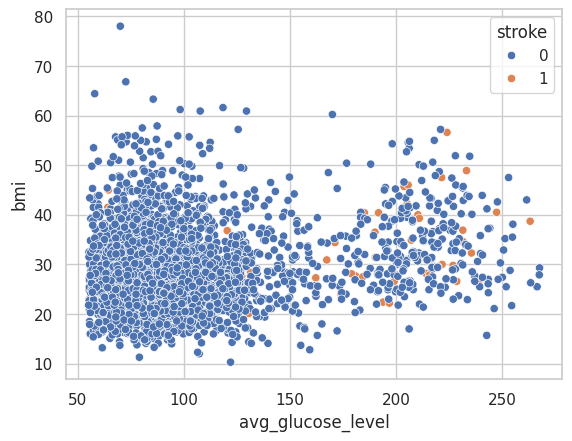

In [381]:
sns.scatterplot(data= Dataset_solo_mujeres, x="avg_glucose_level", y="bmi", hue="stroke")   # se grafica para el caso de las mujeres si hay una relación entre "bmi" y "avg_glucose_level"
f.tight_layout()

In [382]:
#No es evidente visualmente una relación lineal entre las variables "IBM" y "avg_glucose_level" para el género femenino ya sea para aquellas que tuvieron ictus y que no.

In [383]:
Dataset_solo_hombres=df2[df2['gender']=='Male']  # hago lo mismo para los hombres

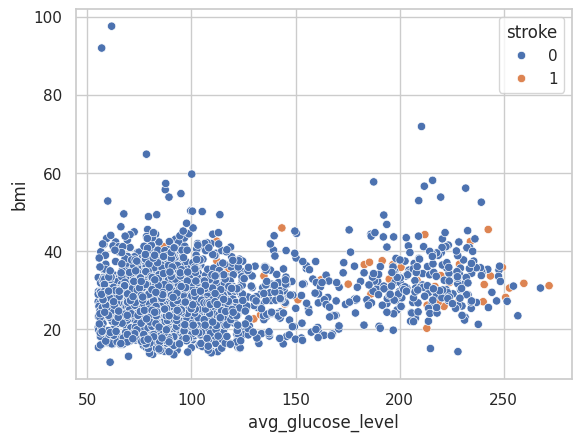

In [384]:
sns.scatterplot(data= Dataset_solo_hombres, x="avg_glucose_level", y="bmi", hue="stroke")
f.tight_layout()

La edad tiene una muy buena correlación a la hora de predecir un ictus.

###7.2.2) Matriz de correlación

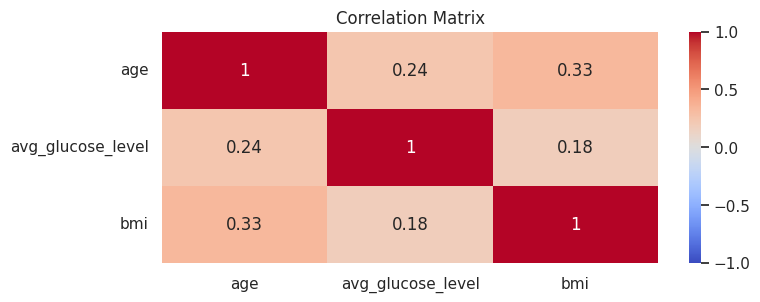

In [385]:
variables_numericas = df2.select_dtypes(include=['float64']).columns.tolist()
correlation_matrix = df2[variables_numericas].corr()
plt.figure(figsize=(8, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

###7.2.3) Matriz de correlación de Spearman

Se estudia la relación entre las variables categóricas nominales del dataset y las variables continuas

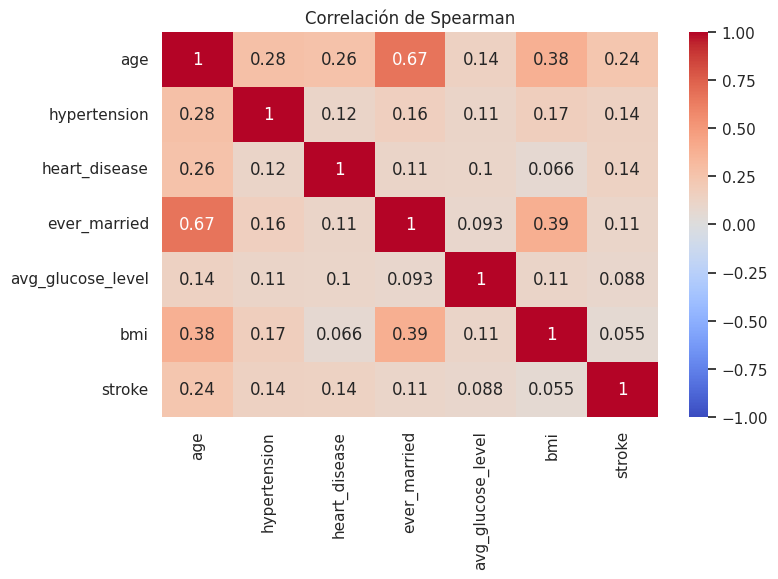

In [386]:
for col in df2.columns:
    if df2.loc[:,col].dtype == 'object':
        unique_values = df2[col].unique()
        if set(unique_values) == {'Yes', 'No'}:
            df2.loc[:,col] = df2[col].map({'Yes': 1, 'No': 0})

df3=df2.drop(['gender','work_type','Residence_type','smoking_status'],axis=1)

spearman_corr = df3.corr(method='spearman')

plt.figure(figsize=(8, 5))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlación de Spearman')
plt.show()

#8) Feature engineering

##8.1) Feature binning

Metodología- Estandarizo las edades. Separo las edades en rangos de 0 a 25, 26 a 50, 51 a 82 años con el fin de mejorar la performance de los algoritmos.

In [387]:
bins_1 = [0, 25, 50, 82]
labels_1 = ['0-25', '26-50', '51-82',]

# Creamos una nueva columna 'rango_de_edad' con los rangos de edad
df2 = df2.copy()
df2.loc[:,'rango_de_edad'] = pd.cut(df2['age'], bins=bins_1, labels=labels_1, right=True)

Según la Organización Mundial de la Salud (OMS), un rango normal para el azúcar en la sangre en ayunas (la cantidad de glucosa en la sangre al menos ocho horas después de una comida), está entre 70 y 100 mg/dl. Entre 100 y 125 mg/dl se habla de glucemia basal alterada y de 126 mg/dl o más son diagnósticos de diabetes.
En base a esta información y teniendo en cuenta los máximos y mínimos de glucosa en sangre del dataset, se propone la siguiente estandarización:

In [388]:
bins_2 = [55, 100, 126, 275]
labels_2 = ['55-100', '101-126', '127-275',]

# Creamos una nueva columna 'rango_de_avg_glucose_level' con los rangos de edad
df2.loc[:,'rango_de_avg_glucose_level'] = pd.cut(df2['avg_glucose_level'], bins=bins_2, labels=labels_2, right=True)

df3=df2.drop(['age','avg_glucose_level'],axis=1)
df3.head()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,bmi,smoking_status,stroke,rango_de_edad,rango_de_avg_glucose_level
id,,,,,,,,,,,
9046,Male,0,1,1,Private,Urban,36.6,formerly smoked,1,51-82,127-275
31112,Male,0,1,1,Private,Rural,32.5,never smoked,1,51-82,101-126
60182,Female,0,0,1,Private,Urban,34.4,smokes,1,26-50,127-275
1665,Female,1,0,1,Self-employed,Rural,24.0,never smoked,1,51-82,127-275
56669,Male,0,0,1,Private,Urban,29.0,formerly smoked,1,51-82,127-275


##8.2) One-hot enconding

<Axes: >

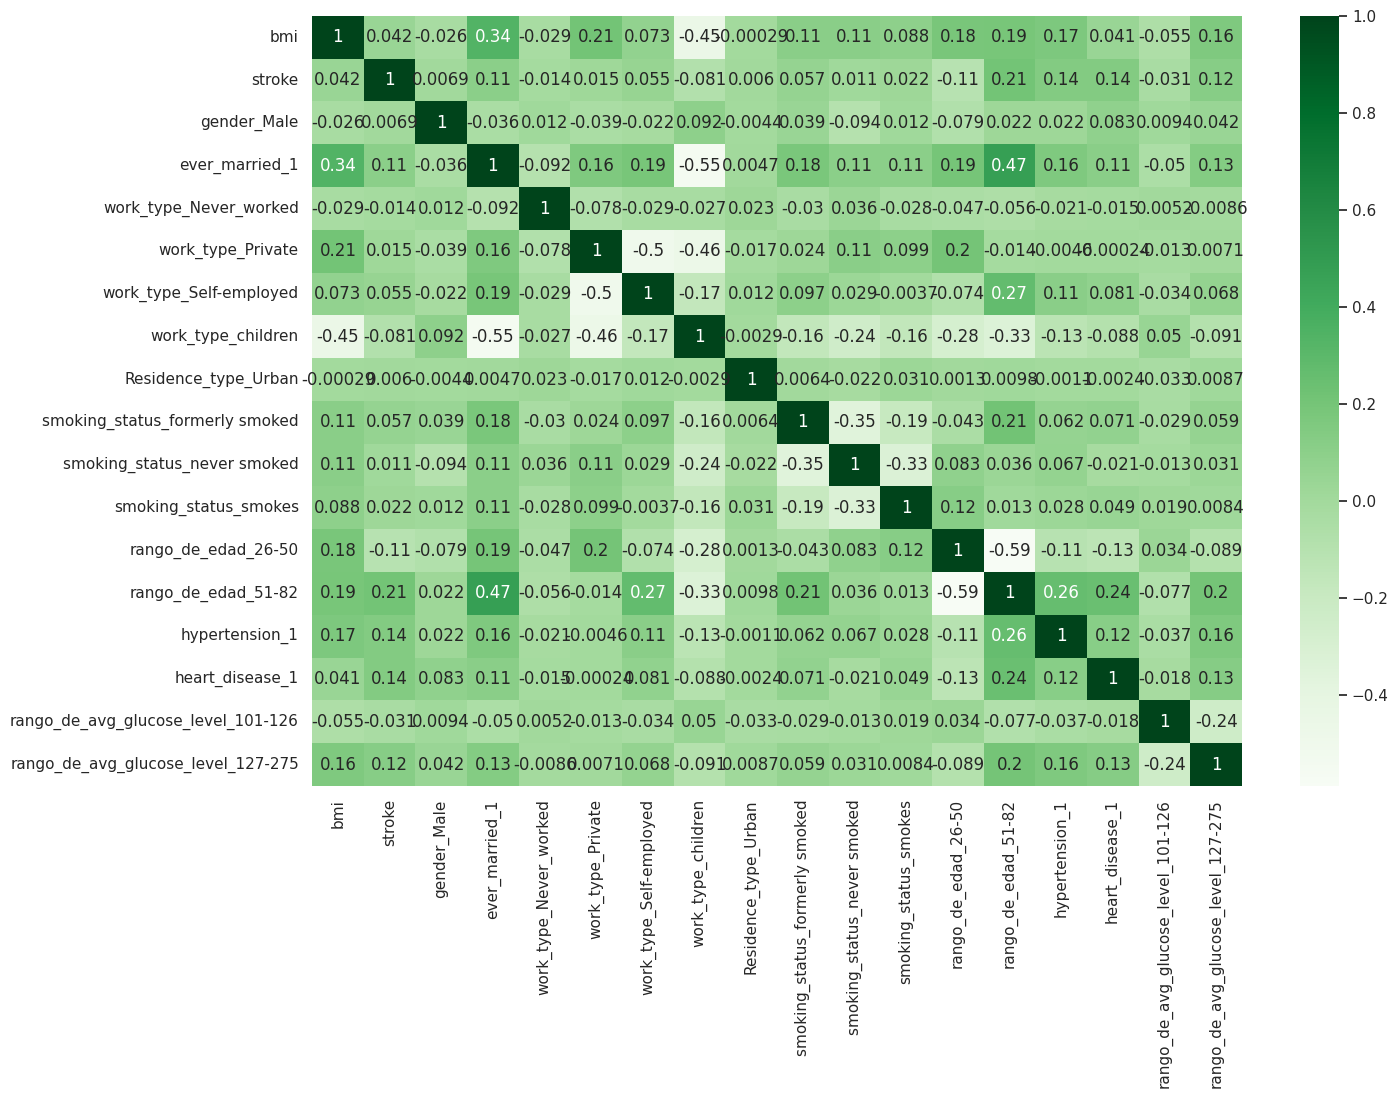

In [389]:
df5=pd.get_dummies(df3,columns=['gender','ever_married','work_type','Residence_type','smoking_status','rango_de_edad','hypertension','heart_disease','rango_de_avg_glucose_level'],
               drop_first=True)
plt.figure(figsize=(15,10))
sns.heatmap(df5.corr(),annot=True,cmap='Greens')

#9) Modeling

Con el fin de predecir un ACV, se aplican tres modelos de machine learning: Regresión logística, Random Forest y SVM. A cada uno de ellos se le hace un previo balanceo de clases con SMOTE, junto a una optimización de hiperparamétros.

In [390]:
X0 = df5.drop('stroke', axis=1)
y = df5[['stroke']]

scaler = StandardScaler()
X = scaler.fit_transform(X0)

In [391]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #separo mi dataset para prueba y entrenamiento
smote = SMOTE(k_neighbors=5,random_state=42) #Aplico SMOTE con el fin de balancear las clases
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [392]:
y_train_smote=y_train_smote.values.ravel()

##9.1) Regresión logistica

In [393]:
classifier = LogisticRegression()
modelo_datos_SMOTE = classifier.fit(X_train_smote, y_train_smote)

# Grilla para Regresión Logistica
#Definición de Hiperparámetros
param_grid_LR = {
    'C': [0.01, 0.1, 1],
    'solver': ['liblinear'],
    'penalty': ['l1', 'l2']
}

logreg = LogisticRegression(max_iter=200)
S_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search_LR = GridSearchCV(logreg, param_grid_LR, cv=S_kfold, scoring='accuracy')
grid_search_LR.fit(X_train_smote, y_train_smote)

print("Mejores parámetros encontrados:", grid_search_LR.best_params_)

y_train_pred_LR = grid_search_LR.predict(X_train_smote)
train_conf_matrix = confusion_matrix(y_train_smote, y_train_pred_LR)

y_test_pred_LR = grid_search_LR.predict(X_test)
test_conf_matrix = confusion_matrix(y_test, y_test_pred_LR)

print("Matriz de confusión LR (Entrenamiento):")
print(train_conf_matrix)

print("Matriz de confusión LR (Prueba):")
print(test_conf_matrix)

print("\nInforme de clasificación para los datos de entrenamiento LR:")
print(classification_report(y_train_smote, y_train_pred_LR))
print("\nInforme de clasificación para los datos de prueba LR:")
print(classification_report(y_test, y_test_pred_LR))

Mejores parámetros encontrados: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Matriz de confusión LR (Entrenamiento):
[[2399 1371]
 [ 368 3402]]
Matriz de confusión LR (Prueba):
[[607 322]
 [  9  44]]

Informe de clasificación para los datos de entrenamiento LR:
              precision    recall  f1-score   support

           0       0.87      0.64      0.73      3770
           1       0.71      0.90      0.80      3770

    accuracy                           0.77      7540
   macro avg       0.79      0.77      0.77      7540
weighted avg       0.79      0.77      0.77      7540


Informe de clasificación para los datos de prueba LR:
              precision    recall  f1-score   support

           0       0.99      0.65      0.79       929
           1       0.12      0.83      0.21        53

    accuracy                           0.66       982
   macro avg       0.55      0.74      0.50       982
weighted avg       0.94      0.66      0.75       982



In [394]:
#importancia de las variables

importancia_predictores_LR = pd.DataFrame(
                            {'predictores': X0.columns,
                             'importancia':  grid_search_LR.best_estimator_.coef_[0]
}
                            )
print("Importancia de los predictores en el modelo LR")
print("-------------------------------------------")
importancia_predictores_LR.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo LR
-------------------------------------------


,predictores,importancia
12,rango_de_edad_51-82,2.777695
11,rango_de_edad_26-50,1.617115
6,work_type_children,0.561540
16,rango_de_avg_glucose_level_127-275,0.295172
4,work_type_Private,0.179916
13,hypertension_1,0.175657
2,ever_married_1,0.162294
9,smoking_status_never smoked,0.140278
10,smoking_status_smokes,0.124093
8,smoking_status_formerly smoked,0.114589


##9.2) Random Forest

In [395]:
# Grilla para Random Forest
#Definicion de Hiperparámetros
param_grid_RF = {
    'n_estimators': [80, 100, 150],
    'max_depth': [8, 10,12]
}

clf = RandomForestClassifier()
S_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search_RF = GridSearchCV(clf, param_grid_RF, cv=S_kfold, scoring='accuracy', return_train_score=True, verbose=3)

grid_search_RF.fit(X_train_smote, y_train_smote)
best_params_RF = grid_search_RF.best_params_
print("Mejores hiperparámetros RF:", best_params_RF)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END max_depth=8, n_estimators=80;, score=(train=0.912, test=0.911) total time=   0.4s
[CV 2/5] END max_depth=8, n_estimators=80;, score=(train=0.901, test=0.893) total time=   0.4s
[CV 3/5] END max_depth=8, n_estimators=80;, score=(train=0.902, test=0.901) total time=   0.4s
[CV 4/5] END max_depth=8, n_estimators=80;, score=(train=0.894, test=0.877) total time=   0.4s
[CV 5/5] END max_depth=8, n_estimators=80;, score=(train=0.900, test=0.881) total time=   0.4s
[CV 1/5] END max_depth=8, n_estimators=100;, score=(train=0.904, test=0.895) total time=   0.5s
[CV 2/5] END max_depth=8, n_estimators=100;, score=(train=0.896, test=0.890) total time=   0.5s
[CV 3/5] END max_depth=8, n_estimators=100;, score=(train=0.895, test=0.889) total time=   0.7s
[CV 4/5] END max_depth=8, n_estimators=100;, score=(train=0.904, test=0.883) total time=   0.8s
[CV 5/5] END max_depth=8, n_estimators=100;, score=(train=0.903, test=0.885) tota

In [396]:
best_estimator_RF = grid_search_RF.best_estimator_
y_pred_RF = best_estimator_RF.predict(X_train_smote)

y_train_pred_RF = best_estimator_RF.predict(X_train_smote)
print("Resultados en el conjunto de entrenamiento RF:")
print(f"Accuracy en RF: {accuracy_score(y_train_smote, y_train_pred_RF)}")
print(confusion_matrix(y_train_smote, y_train_pred_RF))
print(classification_report(y_train_smote, y_train_pred_RF))

y_test_pred_RF = best_estimator_RF.predict(X_test)
print("\nResultados en el conjunto de prueba RF:")
print(f"Accuracy en RF: {accuracy_score(y_test, y_test_pred_RF)}")
print(confusion_matrix(y_test, y_test_pred_RF))
print(classification_report(y_test, y_test_pred_RF))

Resultados en el conjunto de entrenamiento RF:
Accuracy en RF: 0.9640583554376658
[[3553  217]
 [  54 3716]]
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      3770
           1       0.94      0.99      0.96      3770

    accuracy                           0.96      7540
   macro avg       0.96      0.96      0.96      7540
weighted avg       0.96      0.96      0.96      7540


Resultados en el conjunto de prueba RF:
Accuracy en RF: 0.884928716904277
[[861  68]
 [ 45   8]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       929
           1       0.11      0.15      0.12        53

    accuracy                           0.88       982
   macro avg       0.53      0.54      0.53       982
weighted avg       0.90      0.88      0.89       982



In [397]:
#importancia de las variables
importancia_predictores_RF = pd.DataFrame(
                            {'predictores': X0.columns,
                             'importancia':  grid_search_RF.best_estimator_.feature_importances_
}
                            )
print("Importancia de los predictores en el modelo RF")
print("-------------------------------------------")
importancia_predictores_RF.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo RF
-------------------------------------------


,predictores,importancia
12,rango_de_edad_51-82,0.238094
2,ever_married_1,0.107188
0,bmi,0.101267
11,rango_de_edad_26-50,0.096282
7,Residence_type_Urban,0.084289
16,rango_de_avg_glucose_level_127-275,0.074984
1,gender_Male,0.069800
4,work_type_Private,0.039934
9,smoking_status_never smoked,0.034739
13,hypertension_1,0.028709


##9.3) Support Vector Machine

In [398]:
svm = SVC()

#Grilla de hiperparámetros para SVM
param_grid_SVM = [{'C':[1,10],'kernel':['linear']},{'gamma':[0.01,0.1], 'C':[1,10],'kernel':['rbf']}]

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_SVM = GridSearchCV(svm, param_grid_SVM, cv=skf, scoring='accuracy', n_jobs=-1, verbose=2)
grid_SVM.fit(X_train_smote, y_train_smote)

print(f"Mejores hiperparámetros SVM: {grid_SVM.best_params_}")
print(f"Mejor puntaje de validación SVM: {grid_SVM.best_score_}")

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Mejores hiperparámetros SVM: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Mejor puntaje de validación SVM: 0.9411140583554378


In [399]:
train_predictions_SVM = grid_SVM.predict(X_train_smote)
print("\nResultados en el conjunto de entrenamiento SVM:")
print(classification_report(y_train_smote, train_predictions_SVM))
print(f"Accuracy en entrenamiento SVM: {accuracy_score(y_train_smote, train_predictions_SVM)}")

test_predictions_SVM = grid_SVM.predict(X_test)
print("\nResultados en el conjunto de prueba SVM:")
print(classification_report(y_test, test_predictions_SVM))
print(f"Accuracy en prueba SVM: {accuracy_score(y_test, test_predictions_SVM)}")
print(f"Matriz de confusión SVM:\n {confusion_matrix(y_test, test_predictions_SVM)}")


Resultados en el conjunto de entrenamiento SVM:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95      3770
           1       0.94      0.98      0.96      3770

    accuracy                           0.96      7540
   macro avg       0.96      0.96      0.96      7540
weighted avg       0.96      0.96      0.96      7540

Accuracy en entrenamiento SVM: 0.9559681697612732

Resultados en el conjunto de prueba SVM:
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       929
           1       0.11      0.17      0.14        53

    accuracy                           0.88       982
   macro avg       0.53      0.55      0.54       982
weighted avg       0.91      0.88      0.89       982

Accuracy en prueba SVM: 0.8839103869653768
Matriz de confusión SVM:
 [[859  70]
 [ 44   9]]


#10) Conclusiones

In [400]:
print(f"Recall en SVM: {recall_score(y_test, test_predictions_SVM, pos_label=1)}")
print(f"Recall en RF: {recall_score(y_test, y_test_pred_RF, pos_label=1)}")
print(f"Recall en LR: {recall_score(y_test, y_test_pred_LR, pos_label=1)}")

print("---------------------------------")

print(f"Accuracy en SVM: {accuracy_score(y_test, test_predictions_SVM)}")
print(f"Accuracy en RF: {accuracy_score(y_test, y_test_pred_RF)}")
print(f"Accuracy en LR: {accuracy_score(y_test, y_test_pred_LR)}")

Recall en SVM: 0.16981132075471697
Recall en RF: 0.1509433962264151
Recall en LR: 0.8301886792452831
---------------------------------
Accuracy en SVM: 0.8839103869653768
Accuracy en RF: 0.884928716904277
Accuracy en LR: 0.6629327902240326


Luego de haber realizado un análisis exploratorio sobre las variables del dataset y su influencia sobre la ocurrencia de un ACV, se pudieron sacar varias conclusiones. La edad es un factor preponderante a la hora de realizar la predicción de un accidente o no, tal como lo demuestran los modelos de machine learning. Siendo la franja de 50 a 82 años la de mayor importancia. Variables  como antecedentes de fumar, lugar de residencia y trabajo, no tuvieron mayor incidencia sobre la predicción.
El haber estado casado, tener hipertensión, y un nivel de glucosa de 127-275 mg/dl fueron variables que le siguieron de importancia luego de la edad.

Los tres modelos de predicción, SVM y LR, tuvieron buena exactitud pero mal recall, mientras que el modelo de regresión logística se comportó diferente. Como estamos frente a un modelo desbalanceado, un parámetro de exactitud no nos sirve para determinar que modelo fue mejor. Sin embargo, con la premisa de que se está prediciendo un acontecimiento que puede tener graves consecuencias en la salud de cada persona, es necesario enfocarse en la sensibilidad de los modelos o su recall. Es decir, predecir la mayor cantidad de positivos, aún siendo falsos. Habiendo dicho esto, la regresión logística, en términos de sensibilidad, se comportó mejor que los otros dos.
En conclusión, un modelo de regresión logística se adecúa mejor para la predicción de un ACV, de acuerdo a los datos suministrados en el dataset.